# Lesson 5 - Decision Tree
This is the code to accompany the Lesson 5 (FREE CHOICE) mini-project.

Your algorithm choices are the following:

>1. K nearest neighbors
>2. Random Forest
>3. Adaboost (sometimes also called 'Boosted decision tree')


Use an algo to identify emails from the Enron corpus by author:
Sara has label 0 Chris has label 1

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
print('zerrrrep')

zerrrrep


# 1. K Nearest Neighbour (KNN)
K Nearest Neighbour uses a distance metric like Euclidean distance to identity similarity of target data point (sample) in test or validation set to the data points (samples) in the training set. Then based on the user specified `k`, it finds the k closest points (samples) to the target data point. 

Afterward, it chooses the `most frequent label` among the k closest points (majority voting) as the class label of the target sample. The class labels can be also assigned based on weighted voting of the k closest data points to the data point.

In [50]:
#!/usr/bin/python

""" 
    This is the code to accompany the Lesson 5 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier


# features_train and features_test are the features for the training and testing datasets, respectively;
# labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [51]:
print(f'train: {features_train.size}')
print(f'test: {features_test.size}')

train: 59878700
test: 6654030


In [52]:
print ('number of features %d' % len(features_train[0]))

# number of features bij Percentile=1  (in email_preprocess.py): 379
# number of features bij Percentile=10 (in email_preprocess.py): 3785

number of features 3785


## K = 3

In [61]:
# Initialize our classifier
t0 = time()
clf = KNeighborsClassifier(n_neighbors=3)
print ("training time:", round(time()-t0, 3), "s")

training time: 0.0 s


In [62]:
# Fitting the model with the data
clf.fit(features_train, labels_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
# Predict
t0 = time()
clf.predict(features_test)
print('Number of events predicted in Chris class is', sum(clf.predict(features_test) ==1))
print ("prediction time:", round(time()-t0, 3), "s")

clf.score(features_test, labels_test)
print('accuracy of the KNN classifiation is: %0.3f' % clf.score(features_test, labels_test))

Number of events predicted in Chris class is 1066
prediction time: 255.874 s
accuracy of the KNN classifiation is: 0.881


`uitslag bij SelectPercentile = 0.01: 0.943   | 0.1: 0.88


## K = 5

In [7]:
# Initialize our classifier
t0 = time()
clf = KNeighborsClassifier(n_neighbors=5)
print ("training time:", round(time()-t0, 3), "s")

training time: 0.0 s


In [8]:
# Fitting the model with the data
clf.fit(features_train, labels_train)

KNeighborsClassifier()

In [9]:
# Predict
t0 = time()
clf.predict(features_test)
print('Number of events predicted in Chris class is', sum(clf.predict(features_test) ==1))
print ("prediction time:", round(time()-t0, 3), "s")

print('accuracy of the KNN classifiation is: %0.3f' % clf.score(features_test, labels_test))

Number of events predicted in Chris class is 1116
prediction time: 302.998 s
accuracy of the KNN classifiation is: 0.857


uitslag bij SelectPercentile = 0.01: 0.938    | 0.1: 0.86


## K = 1

In [58]:
# Initialize our classifier
t0 = time()
clf = KNeighborsClassifier(n_neighbors=8)
print ("training time:", round(time()-t0, 3), "s")

training time: 0.0 s


In [59]:
# Fitting the model with the data
clf.fit(features_train, labels_train)

KNeighborsClassifier(n_neighbors=8)

In [60]:
# Predict
t0 = time()
y_pred = clf.predict(features_test)
print('Number of events predicted in Chris class is:', sum(clf.predict(features_test) ==1))
print ("prediction time:", round(time()-t0, 3), "s")

print('accuracy of the KNN classifiation is: %0.3f' % clf.score(features_test, labels_test))

Number of events predicted in Chris class is: 1222
prediction time: 344.681 s
accuracy of the KNN classifiation is: 0.795


uitslag bij SelectPercentile = 0.01: ??    |
                               0.1 : 0.98   


In [13]:
# dit zijn de predictions:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [14]:
clf.predict_proba(features_test)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [15]:
print ('number of features %d' % len(features_train[0]))

number of features 3785


## Metrics

In [56]:
from sklearn import metrics

In [57]:
print("Accuracy of the predictions:", metrics.accuracy_score(labels_test, y_pred))
print("Balanced accuracy of the predictions:", metrics.balanced_accuracy_score(labels_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(labels_test, y_pred), '\n')
print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(labels_test, y_pred))

Accuracy of the predictions: 0.8179749715585893
Balanced accuracy of the predictions: 0.8206655490034889
MCC of the predictions: 0.6787141662888279 

Confusion matrix of the predictions:
 [[582 311]
 [  9 856]]


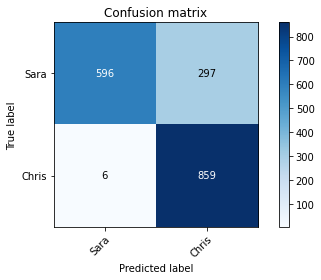

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
 
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


# Plot non-normalized confusion matrix
plot_confusion_matrix(labels_test, y_pred, classes= ['Sara','Chris'], title='Confusion matrix')

plt.show();

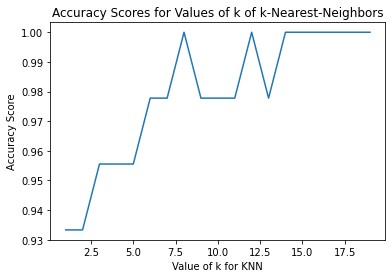

In [238]:
k_range = list(range(1,20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show();

# 2. Random Forest

In [41]:
from sklearn import metrics

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RFclf = RandomForestClassifier(max_depth=5, min_samples_leaf=30, random_state=0)
RFclf.fit(features_train, labels_train)
y_pred = RFclf.predict(features_test)
print(RFclf.feature_importances_)

[0.         0.         0.         ... 0.         0.         0.00091576]


In [48]:
print("Accuracy of the predictions:", metrics.accuracy_score(labels_test, y_pred))
print("Balanced accuracy of the predictions:", metrics.balanced_accuracy_score(labels_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(labels_test, y_pred))
print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(labels_test, y_pred), '\n')
print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(labels_test, y_pred))


Accuracy of the predictions: 0.8179749715585893
Balanced accuracy of the predictions: 0.8206655490034889
MCC of the predictions: 0.6787141662888279
Confusion matrix of the predictions:
 [[582 311]
 [  9 856]] 

Confusion matrix of the predictions:
 [[582 311]
 [  9 856]]


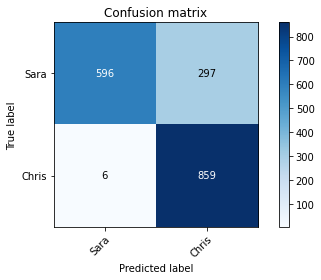

In [25]:
plot_confusion_matrix(labels_test, y_pred, classes=['Sara','Chris'],title='Confusion matrix')

plt.show()

In [23]:
print ('number of features %d' % len(features_train[0]))

number of features 3785


## Performance measure

To assess performance of the machine learning model, we can use the following measure of the performance of the model:



* **precision** is also referred to as positive predictive value (PPV)

$${\displaystyle {\text{Precision}}=\text{True positive rate} = {\frac {tp}{tp+fp}}\,}$$

* **Recall** in this context is also referred to as the true positive rate or sensitivity




$${\displaystyle {\text{Recall}}={\frac {tp}{tp+fn}}\,} $$

 

* **specificity** True negative rate



$${\displaystyle {\text{True negative rate}}={\frac {tn}{tn+fp}}\,}$$

* **Accuracy**: This measure gives you a sense of performance for all the classes together as follows:

$$ {\displaystyle {\text{Accuracy}}={\frac {tp+tn}{tp+tn+fp+fn}}\,}$$


\begin{equation*} Accuracy=\frac{Number\:of\:correct\:predictions}{(Total\:number\:of\:data\:points (samples))} \end{equation*}

$${\displaystyle {\text{Balanced Accuracy}}={\frac {Recall+Specificity
}{2}}\,}$$

* **Confusion matrix (or error matrix)**: True and false classification of the samples in all the classes can be shown in a matrix which is called confusion (or error) matrix. The columns are usually considered as the predicted classes and rows as actual classes. Hence, the diagonal elements of the matrix will be the total number of true classifcation in each class. 
